# 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)


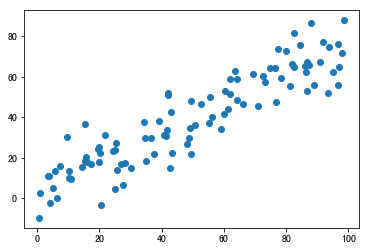

In [30]:
plt.scatter(X[:,0],X[:,1])

###demean特征值归零


In [5]:
def demean(X):
    return X-np.mean(X,axis=0)


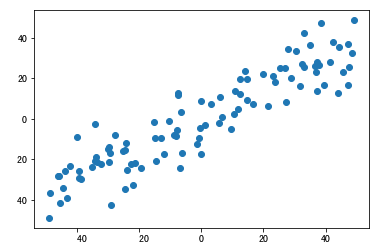

In [32]:
X_demean=demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])


## 梯度上升法

In [17]:
#f函数定义
def f(w,X):
    return np.sum((X.dot(w))**2)/len(X)
#梯度正规计算
def df_math(w,X):
    return X.T.dot(X.dot(w))*2/len(X)
#梯度测试计算方式
def df_debug(w,X,epsilon=0.0001):    #w为反向向量，极小
    res=np.empty(len(w))
    for i in range(len(w)):
        w_1=w.copy()
        w_1[i]+=epsilon
        w_2=w.copy()
        w_2[i]-=epsilon
        res[i]=(f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res
#每次都要将w长度归为1
def direction(w):
    return w/np.linalg.norm(w)
#梯度上升函数定义（每次都要用方向向量，长度必须为1）
def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w=direction(initial_w)
    cur_iter=0
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w)
        if (abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter+=1
    return w




In [34]:
initial_w=np.random.random(X.shape[1])
eta=0.001
#注意：不能使用StandardScaler标准化数据，使用后方差已经确定了，也就无所谓方差最大化了
gradient_ascent(df_debug,X_demean,initial_w,eta)


array([0.95045125, 0.31087363])

In [35]:
gradient_ascent(df_math,X_demean,initial_w,eta)


array([0.95045125, 0.31087363])

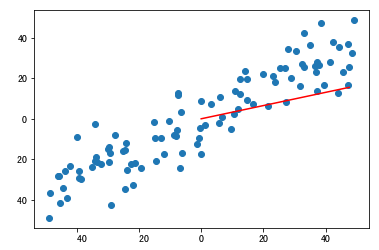

In [36]:
w=gradient_ascent(df_math,X_demean,initial_w,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],color='r')

# 04获取前n个主成分

In [18]:
#f函数定义
def f(w,X):
    return np.sum((X.dot(w))**2)/len(X)
#梯度正规计算
def df(w,X):
    return X.T.dot(X.dot(w))*2/len(X)
#每次都要将w长度归为1
def direction(w):
    return w/np.linalg.norm(w)
#梯度上升函数定义（每次都要用方向向量，长度必须为1）
def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w=direction(initial_w)
    cur_iter=0
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w)
        if (abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter+=1
    return w

In [19]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)
X = demean(X)
initial_w=np.random.random(X.shape[1])
eta=0.01
w=first_component(X,initial_w,eta)
w

array([0.79584849, 0.60549582])

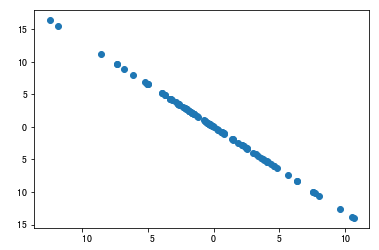

In [20]:
#第二主成分计算
X2=np.empty(X.shape)
for i in range(len(X)):
    X2[i]=X[i]-X[i].dot(w)*w
#另一种计算方式
X_2=X-X.dot(w).reshape(-1,1)*w
plt.scatter(X2[:,0],X2[:,1])


In [21]:
#找到w2
w2 = first_component(X2, initial_w, eta)
w2

array([-0.60549146,  0.7958518 ])

In [22]:
w.dot(w2)   #两个向量垂直，点乘必然为0

5.478669456882024e-06

In [26]:
#封装
def first_n_component(n,X,eta=0.01,n_iters=1e4,epsilon=1e-8):
    X_pca=X.copy()
    X_pca=demean(X_pca)
    res=[]
    for i in range(n):
        initial_w=np.random.random(X_pca.shape[1])
        w=first_component(X_pca,initial_w,eta)
        res.append(w)
        X_pca=X_pca-X_pca.dot(w).reshape(-1,1)*w
    return res
        
        

In [28]:
W=first_n_component(2,X)

In [29]:
W[0].dot(W[1])

5.994024603106496e-06

# 05降维


In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)



In [4]:
from PCA_1 import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca.components_

array([[ 0.78258445,  0.62254444],
       [-0.6225396 ,  0.7825883 ]])

In [6]:

pca=PCA(n_components=1)
pca.fit(X)


PCA(n_components=1)

In [8]:
#降维
X_reduce=pca.transform(X)
X_reduce.shape

(100, 1)

In [11]:
X_reduce[:10]


array([[ 43.68787668],
       [ 11.03911895],
       [116.0649708 ],
       [100.86200227],
       [112.52228643],
       [121.16540065],
       [ 25.00745984],
       [ 74.08446091],
       [ 64.91988464],
       [ 24.44828551]])

In [12]:
X_restore=pca.inverse_transform(X_reduce)

In [13]:
X_restore.shape

(100, 2)

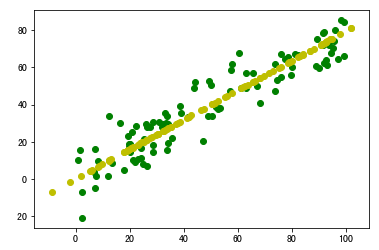

In [16]:
plt.scatter(X[:,0],X[:,1],color='g')
plt.scatter(X_restore[:,0],X_restore[:,1],color='y')
#可见，只是将一维坐标系中的直线显示在二维坐标系中

# 06sklearn中的pca

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)



In [24]:

%%time
#单纯knn

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)


CPU times: user 3.46 ms, sys: 1.74 ms, total: 5.2 ms
Wall time: 3.52 ms


In [26]:
knn_clf.score(X_test,y_test)

0.9866666666666667

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_train)
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)


In [29]:
%%time
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

CPU times: user 1.63 ms, sys: 766 µs, total: 2.4 ms
Wall time: 1.64 ms


In [30]:
knn_clf.score(X_test_reduction,y_test)

0.6066666666666667

#主成分解释的方差

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_
#第一个主成分可以解释14.5%，第二个可以解释13.7%


array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

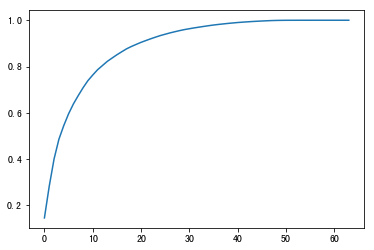

In [36]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])] )


In [ ]:
# pca=PCA(0.95)
pca.fit(X_train)
pca.n_components_
#在PCA括号里填入一个【0，1】之间的数，为可解释的百分比，就能提取对应的主成分

In [42]:
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)


In [45]:
%%time
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

CPU times: user 2.61 ms, sys: 1.5 ms, total: 4.11 ms
Wall time: 2.53 ms


In [46]:
knn_clf.score(X_test_reduction,y_test)

0.98

##PCA对数据降维，进行降维可视化

In [49]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
X_reduction

array([[ -1.25946628,  21.27488358],
       [  7.95761126, -20.76869856],
       [  6.99192278,  -9.95598694],
       ...,
       [ 10.80128388,  -6.96025214],
       [ -4.87210063,  12.42395221],
       [ -0.34438947,   6.36554907]])

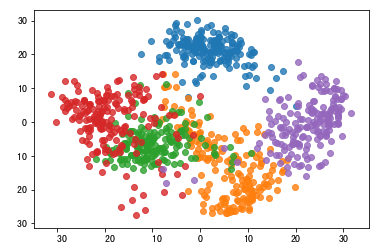

In [51]:
for i in range(5):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()
#这个图怎么好好解释？哭泣。。。

# MNIST

In [57]:
import numpy as np
from sklearn.datasets import fetch_mldata


mnist = fetch_mldata('MNIST original')
mnist
#避免报错，需要将数据文件放在mldata文件夹里再运行

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [69]:
X,y=mnist['data'],mnist['target']
X_train=np.array(X[:60000],dtype=float)
y_train=np.array(y[:60000],dtype=float)
X_test=np.array(X[60000:],dtype=float)
y_test=np.array(y[60000:],dtype=float)



In [70]:
#使用knn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
%time knn_clf.fit(X_train,y_train)

CPU times: user 16.1 s, sys: 55.7 ms, total: 16.1 s
Wall time: 16.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
%time knn_clf.score(X_test,y_test)

CPU times: user 10min 13s, sys: 519 ms, total: 10min 14s
Wall time: 10min 14s


0.9688

### 使用PCA降维之后再KNN

In [73]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
pca.fit(X_train)
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)


In [74]:
knn_clf=KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction,y_train)


CPU times: user 288 ms, sys: 3.95 ms, total: 292 ms
Wall time: 292 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
%time knn_clf.score(X_test_reduction,y_test)

CPU times: user 55.4 s, sys: 35.6 ms, total: 55.5 s
Wall time: 55.5 s


0.9728

# 08降噪